# Simple linear regression

***

### Table of contents

#### 1. What is simple linear regression?

#### 2. Simple linear regression to predict power output
- 2.1 Preliminary analysis
- 2.2 Constructing the model
- 2.3 Removing outliers

#### 3. Polynomial regression to predict power output
- 3.1 Change degree parameter
- 3.2 Removing outliers

#### 4. References

<br>

### 1. What is simple linear regression?
***

Regression is one of the most important fields in statistics and machine learning. It is a statistical method which attempts to determine the strength and character of the relationship between one dependent variable and a series of other independent variables.<SUP>1</SUP> It allows the relationship to be modelled mathematically to find trends in a data set.<SUP>2</SUP>  The overall idea of regression is to examine two things:

1. Does a set of predictor variables do a good job in predicting an outcome (dependent) variable?
2. Which variables in particular are significant predictors of the outcome variable, and in what way do they impact the outcome variable?

There are many regression methods available, with linear regression being one of the most important and widely used type of predictive analysis.<SUP>3</SUP> <SUP>4</SUP> Simple linear regression, or single-variate linear regression, concerns two-dimensional sample points with one independent variable and one dependent variable, and finds a linear function (i.e a straight line) that predicts the dependent variable values as a function of the independent variable as accurately as possible.<SUP>5</SUP> The goal of simple linear regression is to create a linear model that minimises the sum of squares of the residuals/error.

![Simple Linear Regression](simple_linear_reg.PNG)

It makes certain assumptions about the data:<SUP>6</SUP>

1. **Homogeneity of variance:** the size of the error in the prediction does not change significantly across the values of the independent variable.
2. **Independence of observations:** the observations in the data set were collected using statistically valid sampling methods.
3. **Normality:** the data follows a normal distribution.
4. **Linear relationship:** the line of best fit through the data points is a straight line

The general form of simple linear regression is $Y = a + bX$, where $X$ is the explanatory variable (the variable used to predict $Y$) and $Y$ is the dependent variable (the variable being predicted). The slope of the line is $b$ and $a$ is the intercept.<SUP>7</SUP>

<br>

### 2. Simple linear regression to predict power output
***

Simply linear regression will be performed on the ```powerproduction``` data set, with the goal of accurately predicting wind turbine power output from wind speed values. The first step is to import all the required libraries and apply a preferred plot style.

In [1]:
# Import the required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as stats
from sklearn import linear_model
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Apply a plot style
plt.style.use("ggplot")

The ```pandas.read_csv()``` function is used to read the comma-separated values (csv) file into DataFrame.<SUP>8</SUP> As shown below, the file comprises 500 rows with two columns, one for wind speed and one for wind power. 

In [2]:
# Read the dataset
df = pd.read_csv("powerproduction.csv")
df

,speed,power
0,0.000,0.0
1,0.125,0.0
2,0.150,0.0
3,0.225,0.0
4,0.275,0.0
...,...,...
495,24.775,0.0
496,24.850,0.0
497,24.875,0.0
498,24.950,0.0


The ```pandas.DataFrame.describe()``` function is used to generated descriptive statistics for the *wind* and *power* columns.<SUP>9</SUP>

In [3]:
# Examine various statistical data about the data set
df.describe()

,speed,power
count,500.000000,500.000000
mean,12.590398,48.014584
std,7.224991,41.614572
min,0.000000,0.000000
25%,6.324750,5.288000
50%,12.550500,41.645500
75%,18.775250,93.537000
max,25.000000,113.556000


#### 2.1 Preliminary analysis

The plots below illustrate the distribution of the wind speed and power values respectively. In contrast to wind speed, which has a uniform distribution, there are two obvious peaks in the distribution of wind power values. Most values are close to 0 or 100, with less values in the 25-75 range approximately.

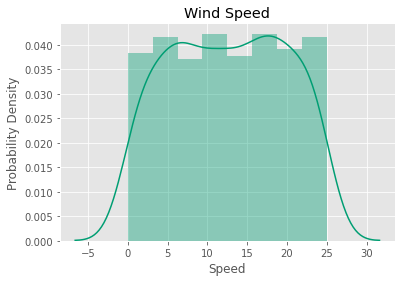

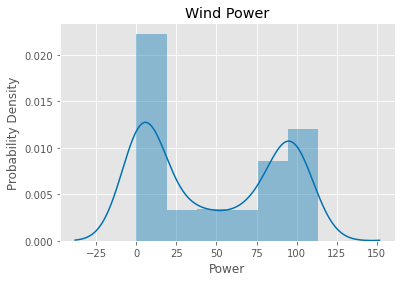

In [4]:
# Plot the distribution of the wind speed values
sns.distplot(df["speed"], kde=True, color="#009E73")
# Add the plot title and axis lables
plt.xlabel("Speed"), plt.ylabel("Probability Density"), plt.title("Wind Speed")
plt.show()

# Plot the distribution of the wind power values
sns.distplot(df["power"], kde=True, color="#0072B2")
# Add the plot title and axis labels
plt.xlabel("Power"), plt.ylabel("Probability Density"), plt.title("Wind Power")
plt.show()

Linear regression predicts a dependent variable value ```y``` based on a given independent variable ```x```, giving the most optimal value for the intercept and slope. The ```sklearn.linear_model.LinearRegression()``` method fits a linear model to minimise the residual sum of squares between the observed targets in the data set, and the targets predicted by the linear approximation.<SUP>10</SUP> The code below outputs the slope and intercept, which are then used to fit a line of best fit to the entire data set.<SUP>11</SUP> It is clear that the data set is somewhat linear in nature, so in the next section a model is generated.

Slope:  4.9175956654046695
Intercept:  -13.899902630519634


(Text(0.5, 6.79999999999999, 'Speed'),
 Text(3.674999999999997, 0.5, 'Power'),
 Text(0.5, 1.0, 'Line of best fit'))

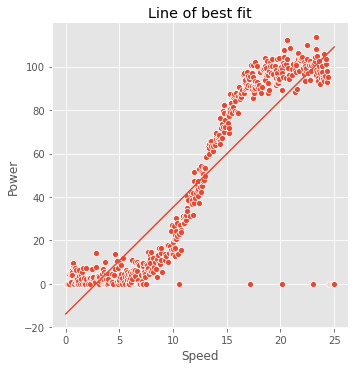

In [5]:
# Create an array for x and y
x = np.array(df[["speed"]])
y = np.array(df[["power"]])

# Fit a linear model
simp_reg = linear_model.LinearRegression()
simp_reg.fit(x, y)

# Store the slope and intercept as variables
slope_slr = simp_reg.coef_[0][0]
intercept_slr = simp_reg.intercept_[0]

# Print the slope and intercept
print("Slope: ", slope_slr)
print("Intercept: ", intercept_slr)

# Create a scatter plot
sns.relplot(x="speed", y="power", data=df);
# Create a line of best fit
plt.plot(df["speed"], slope_slr*df["speed"] + intercept_slr)
# Add the plot title and axis labels
plt.xlabel("Speed"), plt.ylabel("Power"), plt.title("Line of best fit")

#### 2.2 Constructing the model

A seed is set initially to reproduce the results.<SUP>12</SUP> ```sklearn.model_selection.train_test_split()``` is used to split the data into random train and test subsets.<SUP>13</SUP> <SUP>14</SUP> By setting the ```test_size``` parameter to 0.3, 30% of the data will be used as the test data and 70% will be used as the training data. 

In [6]:
# Set the seed to reproduce the results
np.random.seed(20)

# Split the data into training and testing subsets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

The code below creates a scatter plot of the training and testing data. 

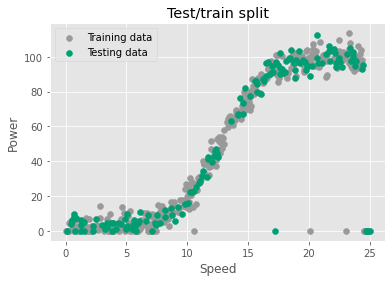

In [7]:
# Creat a scatter plot of the training and testing data
plt.scatter(x_train, y_train, label="Training data", color="#999999")
plt.scatter(x_test, y_test, label="Testing data", color="#009E73")
# Add the plot title and axis labels
plt.xlabel("Speed"), plt.ylabel("Power"), plt.title("Test/train split")
plt.legend()
plt.show()

The ```sklearn.linear_model.LinearRegression()``` method is used to fit the linear model to the training data.

In [8]:
# Create the linear model and train it
slr_model = LinearRegression()
slr_model.fit(x_train, y_train)

LinearRegression()

Using the trained model, the ```predict()``` function is used to predict the ```y``` value on the testing data.<SUP>15</SUP> It returns the labels of the data passed as an argument based on the trained data obtained from the model.<SUP>16</SUP>

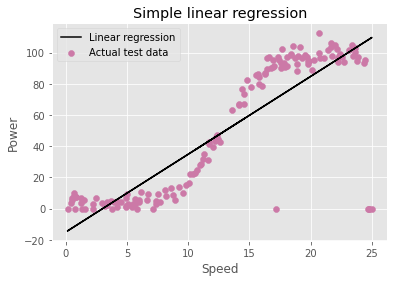

In [9]:
# Use the model to predict on the testing data
prediction = slr_model.predict(x_test.reshape(-1, 1))

# Plot the prediction line against the actual test data
plt.plot(x_test, prediction, label="Linear regression", color="#000000")
plt.scatter(x_test, y_test, label="Actual test data", color="#CC79A7")
# Add the plot title and axis labels
plt.xlabel("Speed"), plt.ylabel("Power"), plt.title("Simple linear regression")
plt.legend()
plt.show()

The ```predict()``` function can now be used to predict the corresponding ```y``` value to a specified ```x``` value.<SUP>17</SUP> In the code below, the ```x``` value is set to 15, which corresponds to a ```y``` value of approximately 59.8 according to the model.

In [10]:
# Predict the power output with a wind speed of 15
slr_model.predict(np.array([[15]]))[0]

array([59.75219683])

```score()``` returns the coefficient of determination R<SUP>2</SUP> of the prediction. Scores are between 0 and 1, with a larger score indicating a better fit.<SUP>18</SUP> The output below infers that the model explains approximately 69% of the variation in the response variable around its mean.<SUP>19</SUP> ```sklearn.metrics.mean_absolute_error()``` and ```sklearn.metrics.mean_squared_error()``` are used to calculate the mean absolute error and mean squared error respectively.<SUP>20</SUP>

In [11]:
# Return the R-squared value, mean absolute error and mean squared error
r2 = slr_model.score(x_test.reshape(-1, 1), y_test)
mae = metrics.mean_absolute_error(y_test, prediction)
mse = metrics.mean_squared_error(y_test, prediction)
print("R-squared: ", r2)
print("Mean absolute error: ", mae)
print("Mean squared error: ", mse)

R-squared:  0.6932094861283964
Mean absolute error:  15.316662969414434
Mean squared error:  551.4917952686645


#### 2.3 Removing outliers

The presence of outliers in a regression dataset can result in a poor fit and lower predictive modelling performance.<SUP>21</SUP> In order to improve the accuracy of the simple linear regression model, outliers can be removed. Although there are several statistical and automatic outlier detection methods available, in this particular instance the outliers can be identified visually by looking at the initial plot of the data set. There are a number of obvious outliers in the 10-25 range along the x-axis where the corresponding ```y``` value is 0. To remove these values, the ```pandas.DataFrame.drop()``` function can be applied, which drops specified labels from rows or columns based on a condition.<SUP>22</SUP>

In [12]:
# Create a new DataFrame with the identified outliers excluded
df_clean = df.drop(df[(df.power == 0.0) & (df.speed > 10.0)].index)
df_clean

,speed,power
0,0.000,0.000
1,0.125,0.000
2,0.150,0.000
3,0.225,0.000
4,0.275,0.000
...,...,...
485,24.249,103.700
486,24.299,93.694
487,24.349,93.078
488,24.374,98.223


The code below runs the previous routine on the new DataFrame.

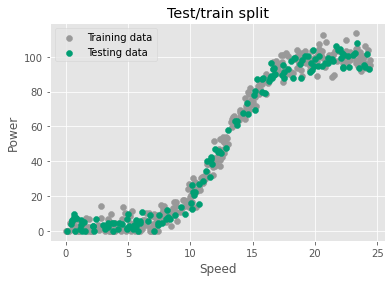

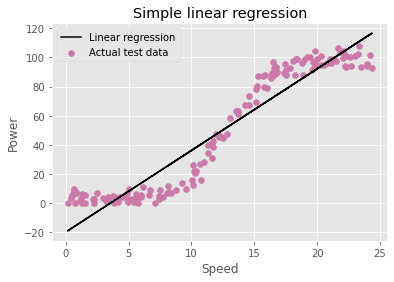

In [13]:
# Set the seed to reproduce the results
np.random.seed(20)

# Create an array for the cleaned x and y values
x_clean = np.array(df_clean[["speed"]])
y_clean = np.array(df_clean[["power"]])

# Split the data into training and testing subsets
x_train_clean, x_test_clean, y_train_clean, y_test_clean = train_test_split(x_clean, y_clean, test_size=0.3)

# Creat a scatter plot of the training and testing data
plt.scatter(x_train_clean, y_train_clean, label="Training data", color="#999999")
plt.scatter(x_test_clean, y_test_clean, label="Testing data", color="#009E73")
# Add the plot title and axis labels
plt.xlabel("Speed"), plt.ylabel("Power"), plt.title("Test/train split")
plt.legend()
plt.show()

# Create the linear model and train it
slr_model_clean = LinearRegression()
slr_model_clean.fit(x_train_clean, y_train_clean)

# Use the model to predict on the testing data
prediction_clean = slr_model_clean.predict(x_test_clean.reshape(-1, 1))

# Plot the prediction line against the actual test data
plt.plot(x_test_clean, prediction_clean, label="Linear regression", color="#000000")
plt.scatter(x_test_clean, y_test_clean, label="Actual test data", color="#CC79A7")
# Add the plot title and axis labels
plt.xlabel("Speed"), plt.ylabel("Power"), plt.title("Simple linear regression")
plt.legend()
plt.show()

In the code below, the ```x``` value is set to 15, which corresponds to a ```y``` value of approximately 64.2 according to the new model.

In [14]:
# Predict the power output with a wind speed of 15
slr_model_clean.predict(np.array([[15]]))[0]

array([64.19134314])

The output below infers that the model explains approximately 90% of the variation in the response variable around its mean, which is a significant improvement on the previous model.

In [15]:
# Return the R-squared value, mean absolute error and mean squared error
r2 = slr_model_clean.score(x_test_clean.reshape(-1, 1), y_test_clean)
mae = metrics.mean_absolute_error(y_test_clean, prediction_clean)
mse = metrics.mean_squared_error(y_test_clean, prediction_clean)
print("R-squared: ", r2)
print("Mean absolute error: ", mae)
print("Mean squared error: ", mse)

R-squared:  0.9015969735156506
Mean absolute error:  10.964569843140406
Mean squared error:  169.83060844476032


As the relationship between the variables does not look entirely linear, it is worth considering polynomial regression as it fits a wide range of curvature.<SUP>23</SUP>

<br>

### 3. Polynomial regression to predict power output
***

Polynomial regression is a special case of multiple linear regression. In polynomial regression, the right polynomial degree needs to be chosen for good bias/variance trade off.<SUP>24</SUP> Polynomial features are those features created by raising existing features to an exponent. The "degree" of the polynomial is used to control the number of features added.<SUP>25</SUP> ```sklearn.preprocessing.PolynomialFeatures()``` is used to create a new feature matrix with the ```degree``` parameter set to 5.<SUP>26</SUP>

(Text(0.5, 0, 'Speed'),
 Text(0, 0.5, 'Power'),
 Text(0.5, 1.0, 'Polynomial regression'))

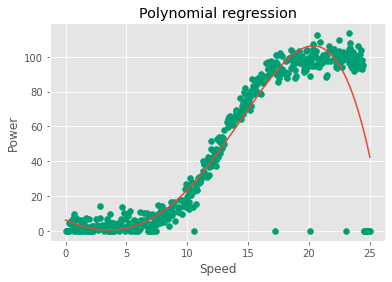

In [16]:
# Set the seed to reproduce the results
np.random.seed(20)

# Generate the polynomial and interaction features
pre_process = PolynomialFeatures(degree=5)
# Transform the data
x_ = pre_process.fit_transform(x)
# Create the model and fit transformed data to y
poly_model = LinearRegression().fit(x_, y)
# Set the predicted y values for transformed x values
y_pred = poly_model.predict(x_)

# Plot the model
plt.scatter(x, y, c="#009E73")
plt.plot(x, y_pred)
# Add the plot title and axis labels
plt.xlabel("Speed"), plt.ylabel("Power"), plt.title("Polynomial regression")

The ```predict()``` function can now be used to predict the corresponding ```y``` value to a specified ```x``` value. In the code below, the ```x``` value is set to 15, which corresponds to a ```y``` value of approximately 69.9 according to the model.

In [17]:
# Predict the power output with a wind speed of 15
poly_model.predict(pre_process.fit_transform([[15]]))

array([[69.87494387]])

The output below infers that the model explains approximately 90% of the variation in the response variable around its mean, which is similar to the simple linear regression performed on the cleaned data.

In [18]:
# Return the R-squared value, mean absolute error and mean squared error
r2 = poly_model.score(x_, y)
mae = metrics.mean_absolute_error(y, y_pred)
mse = metrics.mean_squared_error(y, y_pred)
print("R-squared: ", r2)
print("Mean absolute error: ", mae)
print("Mean squared error: ", mse)

R-squared:  0.8966920390253904
Mean absolute error:  7.312802384105383
Mean squared error:  178.54808719190447


#### 3.1 Change degree parameter

To improve the accuracy, the ```degree``` parameter is set to 10 and the model is regenerated below.

(Text(0.5, 0, 'Speed'),
 Text(0, 0.5, 'Power'),
 Text(0.5, 1.0, 'Polynomial regression'))

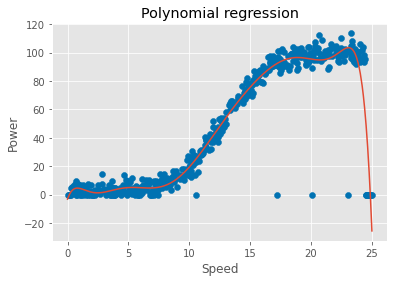

In [19]:
# Generate the polynomial and interaction features
pre_process = PolynomialFeatures(degree=10)
# Transform the data
x_ = pre_process.fit_transform(x)
# Create the model and fit transformed data to y
poly_model = LinearRegression().fit(x_, y)
# Set the predicted y values for transformed x values
y_pred = poly_model.predict(x_)

# Plot the model
plt.scatter(x, y, c="#0072B2")
plt.plot(x, y_pred)
# Add the plot title and axis labels
plt.xlabel("Speed"), plt.ylabel("Power"), plt.title("Polynomial regression")

The ```predict()``` function is used to predict the corresponding ```y``` value to a specified ```x``` value. In the code below, the ```x``` value is set to 15, which corresponds to a ```y``` value of approximately 75.6 according to the model.

In [20]:
# Predict the power output with a wind speed of 15
poly_model.predict(pre_process.fit_transform([[15]]))

array([[75.58313256]])

The output below infers that the model explains approximately 94% of the variation in the response variable around its mean, which is an improvement.

In [21]:
# Return the R-squared value, mean absolute error and mean squared error
r2 = poly_model.score(x_, y)
mae = metrics.mean_absolute_error(y, y_pred)
mse = metrics.mean_squared_error(y, y_pred)
print("R-squared: ", r2)
print("Mean absolute error: ", mae)
print("Mean squared error: ", mse)

R-squared:  0.9385800435176862
Mean absolute error:  4.813946879665769
Mean squared error:  106.15266860239737


#### 3.2 Removing outliers

The accuracy can be futher improved on by using the cleaned data, as demonstrated below.

(Text(0.5, 0, 'Speed'),
 Text(0, 0.5, 'Power'),
 Text(0.5, 1.0, 'Polynomial regression'))

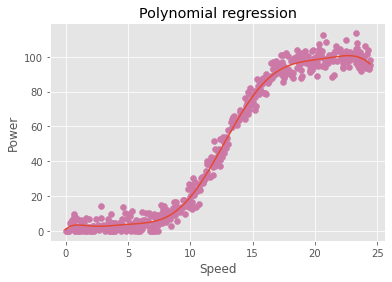

In [22]:
# Generate the polynomial and interaction features
pre_process = PolynomialFeatures(degree=10)
# Transform the data
x_ = pre_process.fit_transform(x_clean)
# Create the model and fit transformed data to y
poly_model = LinearRegression().fit(x_, y_clean)
# Set the predicted y values for transformed x values
y_pred = poly_model.predict(x_)

# Plot the model
plt.scatter(x_clean, y_clean, c="#CC79A7")
plt.plot(x_clean, y_pred)
# Add the plot title and axis labels
plt.xlabel("Speed"), plt.ylabel("Power"), plt.title("Polynomial regression")

The ```predict()``` function is used to predict the corresponding ```y``` value to a specified ```x``` value. In the code below, the ```x``` value is set to 15, which corresponds to a ```y``` value of approximately 77.3 according to the model.

In [23]:
# Predict the power output with a wind speed of 15
poly_model.predict(pre_process.fit_transform([[15]]))

array([[77.28771195]])

The output below infers that the model explains approximately 99% of the variation in the response variable around its mean, which is a satisfactory result. This is also reflected in the low mean absolute and mean squared error values.

In [24]:
# Return the R-squared value, mean absolute error and mean squared error
r2 = poly_model.score(x_, y_clean)
mae = metrics.mean_absolute_error(y_clean, y_pred)
mse = metrics.mean_squared_error(y_clean, y_pred)
print("R-squared: ", r2)
print("Mean absolute error: ", mae)
print("Mean squared error: ", mse)

R-squared:  0.9905661575926319
Mean absolute error:  3.1814253053502775
Mean squared error:  16.129719507433286


<br>

### 4. References

***
1. Investopedia, *Regression Definition* [online] Available at: https://www.investopedia.com/terms/r/regression.asp

2. Statistics How To, *Regression Analysis: Step by Step Articles, Videos, Simple Definitions* [online] Available at: https://www.statisticshowto.com/probability-and-statistics/regression-analysis/ 

3. Statistics Solutions, *What is Linear Regression?* [online] Available at: https://www.statisticssolutions.com/what-is-linear-regression/

4. Real Python, *Linear Regression in Python* [online] Available at: https://realpython.com/linear-regression-in-python/

5. Wikipedia, *Simple linear regression* [online] Available at: https://en.wikipedia.org/wiki/Simple_linear_regression

6. Scribbr, *An introduction to simple linear regression* [online] Available at: https://www.scribbr.com/statistics/simple-linear-regression/

7. Yale University Department of Statistics and Data Science, *Linear Regression* [online] Available at: http://www.stat.yale.edu/Courses/1997-98/101/linreg.htm

8. Pandas, *pandas.read_csv* [online] Available at: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html

9. Pandas, *pandas.DataFrame.describe* [online] Available at: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html

10. scikit learn, *sklearn.linear_model.LinearRegression* [online] Available at: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

11. Medium, *Simple Linear Regression Implementation From Scratch* [online] Available at: https://medium.com/@shuklapratik22/simple-linear-regression-implementation-from-scratch-cb4a478c42bc

12. Stack Overflow, *How to get absolutely reproducible results with Scikit Learn?* [online] Available at: https://stackoverflow.com/questions/52746279/how-to-get-absolutely-reproducible-results-with-scikit-learn

13. scikit learn, *sklearn.model_selection.train_test_split* [online] Available at: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

14. KDnuggets, *A Beginner's Guide to Linear Regression in Python with Scikit-Learn* [online] Available at: https://www.kdnuggets.com/2019/03/beginners-guide-linear-regression-python-scikit-learn.html

15. Machine Learning Mastery, *How to Make Predictions with scikit-learn* [online] Available at: https://machinelearningmastery.com/make-predictions-scikit-learn/
 
16. AskPython, *Python predict() function* [online] Available at: https://www.askpython.com/python/examples/python-predict-function

17. Ryan Flowers, *Linear Regression Python Sklearn [FROM SCRATCH]* [online] Available at: https://www.youtube.com/watch?v=b0L47BeklTE

18. SciPy, *scikit-learn: machine learning in Python* [online] Available at: http://scipy-lectures.org/packages/scikit-learn/index.html

19. Statistics By Jim, *How To Interpret R-squared in Regression Analysis* [online] Available at: https://statisticsbyjim.com/regression/interpret-r-squared-regression/

20. Data Courses, *Evaluation of Regression Models in scikit-learn* [online] Available at: https://www.datacourses.com/evaluation-of-regression-models-in-scikit-learn-846/

21. Machine Learning Mastery, *4 Automatic Outlier Detection Algorithms in Python* [online] Available at: https://machinelearningmastery.com/model-based-outlier-detection-and-removal-in-python/

22. Pandas, *pandas.DataFrame.drop* [online] Available at: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html

23. Towards Data Science, *Introduction to Linear Regression and Polynomial Regression* [online] Available at: https://towardsdatascience.com/introduction-to-linear-regression-and-polynomial-regression-f8adc96f31cb

24. GeeksforGeeks, *Advantages and Disadvantages of different Regression models* [online] Available at: https://www.geeksforgeeks.org/advantages-and-disadvantages-of-different-regression-models/

25. Machine Learning Mastery, *How to Use Polynomial Feature Transforms for Machine Learning* [online] Available at: https://machinelearningmastery.com/polynomial-features-transforms-for-machine-learning/

26. Medium, *Polynomial Regression in Python* [online] Available at: https://medium.com/ai-in-plain-english/implementing-polynomial-regression-in-python-d9aedf520d56